# Лабораторная работа №2

- [Создание базовых образов](#1)
- [Создание "зашумленных" образов](#2)
- [Построение и обучение нейронной сети](#3)
- [Проверка обучения](#4)
- [Выводы](#5)

## Создание базовых образов <a id='1'></a>

В начале выполнения данной лабораторной работы необходимо, согласно номеру варианта, взять 3 любых дорожных знака в качестве эталонов. В качестве эталонных были выбраны знаки: **Въезд запрещён** (или же просто *кирпич*), **Уступи дорогу** (или же *морковка*) и **Парковка**. Каждый из данных знаков необходимо представить в виде матрицы размером 13х13, заполненной либо *1*, либо *-1*. 

После создания эталонной матрицы, необходимо визуально оценить что получилось в итоге. И для визуализации подобного двумерного массива чисел будет использована следующая функция:

In [18]:
import matplotlib.pyplot as plt
import numpy as np
def visual(matrix, nb_pict, height, width):
    fig, ax = plt.subplots(1, nb_pict, figsize=(10, 5))
    for i in range(nb_pict):
        ax[i].matshow(matrix[i].reshape(height, width), cmap='gray_r' )
        ax[i].set_xticks([])
        ax[i].set_yticks([])
    plt.show()

Далее необходимо создать массив, содержащий все 3 выбранных дорожных знака. Помимо этого, необходимо задать некоторые базовые параметры, например размеры дорожных знаков. Также, ниже представлена визуализация созданных знаков:

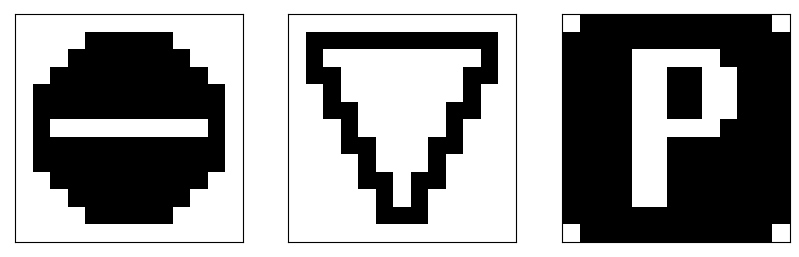

In [133]:
number_patterns = 3     #Количество распознаваемых образов
pattern_height = 13     #Высота одного образа
pattern_width = 13      #Ширина одного образа

patterns = np.array([
        [-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,          #Знак кирпич
         -1,-1,-1,-1, 1, 1, 1, 1, 1,-1,-1,-1,-1,
         -1,-1,-1, 1, 1, 1, 1, 1, 1, 1,-1,-1,-1,
         -1,-1, 1, 1, 1, 1, 1, 1, 1, 1, 1,-1,-1,
         -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,-1,
         -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,-1,
         -1, 1,-1,-1,-1,-1,-1,-1,-1,-1,-1, 1,-1,
         -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,-1,
         -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,-1,
         -1,-1, 1, 1, 1, 1, 1, 1, 1, 1, 1,-1,-1,
         -1,-1,-1, 1, 1, 1, 1, 1, 1, 1,-1,-1,-1,
         -1,-1,-1,-1, 1, 1, 1, 1, 1,-1,-1,-1,-1,
         -1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1],

        [-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,           #Знак морковка
         -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,-1,
         -1, 1,-1,-1,-1,-1,-1,-1,-1,-1,-1, 1,-1,
         -1, 1, 1,-1,-1,-1,-1,-1,-1,-1, 1, 1,-1,
         -1,-1, 1,-1,-1,-1,-1,-1,-1,-1, 1,-1,-1,
         -1,-1, 1, 1,-1,-1,-1,-1,-1, 1, 1,-1,-1,
         -1,-1,-1, 1,-1,-1,-1,-1,-1, 1,-1,-1,-1,
         -1,-1,-1, 1, 1,-1,-1,-1, 1, 1,-1,-1,-1,
         -1,-1,-1,-1, 1,-1,-1,-1, 1,-1,-1,-1,-1,
         -1,-1,-1,-1, 1, 1,-1, 1, 1,-1,-1,-1,-1,
         -1,-1,-1,-1,-1, 1,-1, 1,-1,-1,-1,-1,-1,
         -1,-1,-1,-1,-1, 1, 1, 1,-1,-1,-1,-1,-1,
         -1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1],

        [-1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,-1,            #Знак парковка
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1,-1,-1,-1,-1,-1, 1, 1, 1, 1,
          1, 1, 1, 1,-1,-1, 1, 1,-1,-1, 1, 1, 1,
          1, 1, 1, 1,-1,-1, 1, 1,-1,-1, 1, 1, 1,
          1, 1, 1, 1,-1,-1, 1, 1,-1,-1, 1, 1, 1,
          1, 1, 1, 1,-1,-1,-1,-1,-1, 1, 1, 1, 1,
          1, 1, 1, 1,-1,-1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1,-1,-1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1,-1,-1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1,-1,-1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,-1]], 
        dtype=np.float64
)
visual(patterns, number_patterns, pattern_height, pattern_width)


# Создание "зашумленных" образов <a id='2'></a>

После создания эталонных образов, необходимо создать их копии, но при этом внести немного изменений в них. Таким образом, получатся образы неправильных дорожных знаков (или же дорожных знаков, имеющих дефект в изображении). Для этого к каждому пикселю в изображении добавим случайное значение. В результате получится то, что показано ниже:

In [4]:
def create_noise(matrix, power):
    test = []
    for pict in matrix:
        noise = np.random.sample(len(pict)) * power
        temp = np.around(np.multiply(pict, noise))
        np.place(temp, temp == 0, -1)
        np.place(temp, temp < -1, -1)
        np.place(temp, temp > 1, 1)
        test.append(temp)
    return test

# Посторение и обучение нейронной сети <a id='3'></a>

После создания данных для обучения и для проверки работоспособности, необходимо создать нейронную сеть Хопфилда. Матрица весов представляет из себя квадратную матрицу, элементами которой являются весами одного нейрона. Ниже представлен программный код по созданию матрицы весовых коэффициентов (иначе говоря происходит процесс обучения сети).

In [5]:
def train(matrix, number, height, width):
    area = height * width
    weights = np.zeros((area, area))
    for i in range(len(weights)):
        for j in range(len(weights)):
            if i == j or weights[i][j] != 0.0:
                continue
            w = 0.0
            for n in range(number):
                w += matrix[n, i] * matrix[n, j]
            weights[i, j] = w/patterns.shape[0]
            weights[j, i] = weights[i, j]
    return weights

weights = train(patterns, number_patterns, pattern_height, pattern_width)

После создания функции по созданию матрицы весовых коэффициентов, потребуется создать ещё 2 дополнительные функции. **Первая** функция предназначена для подсчёта величины ошибки между двумя массивами, а благодаря **второй** функции будет производится тестирования точности восстановления образа.

In [6]:
def error_counter(arr1, arr2):
    error = 0
    for i in range(len(arr1)):
        if arr1[i] != arr2[i]:
            error += 1
    return error/len(arr1)

def testing(weight, test_patterns, nb_patterns, real_patterns):
    arr_error = []
    result = []
    for i in range(nb_patterns):
        temp = np.dot(weight, test_patterns[i])
        np.place(temp, temp < 0,-1)
        np.place(temp, temp > 0, 1)
        np.place(temp, temp == 0, 1)
        arr_error.append(error_counter(real_patterns[i], temp))
        result.append(temp)
    return arr_error, result

# Проверка обучения <a id='4'></a>

После создания и обучения нейронной сети можно приступить к тестированию результатов, получаемых при попытке ввести искаженные данные. Для этого при помощи функции `create_noise()` создадим массив тестовых и выведем их величины ошибок. Затем при помощи функции `testing()` запустим искажённые данные в нейронную сеть и при помощи `visual()` визуально посмотрим результаты работы алгоритма. При этом, в качестве параметра в функции `create_noise()` задаётся число, которое определять степень изменения рисунка относительно изначального. В качестве первого раза пусть это число будет **1,5**

Величина ошибки 1-го рисунка: 0.14792899408284024
Величина ошибки 2-го рисунка: 0.047337278106508875
Величина ошибки 3-го рисунка: 0.3076923076923077


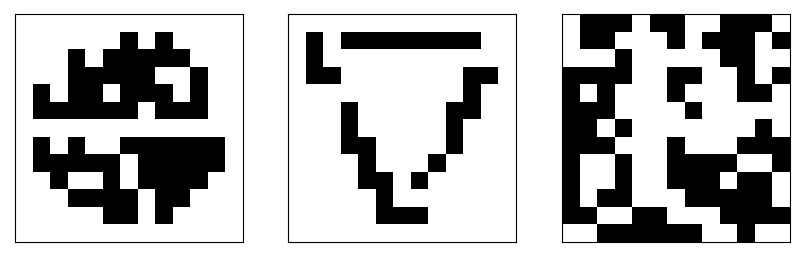

In [7]:
test = create_noise(patterns, 1.5)      #тестовый набор данных
for i in range(len(test)):
    print(f'Величина ошибки {i+1}-го рисунка: {error_counter(test[i], patterns[i])}')
visual(test, number_patterns, pattern_height, pattern_width)

Как видно из вышеприведённых рисунков, картинки приобрели искажения, но не очень сильные. Теперь, запустим функцию тестирования нейронной сети и посмотрим, что получится в итоге:

Итоговая величина ошибки 1-го рисунка: 0.0
Итоговая величина ошибки 2-го рисунка: 0.0
Итоговая величина ошибки 3-го рисунка: 0.0


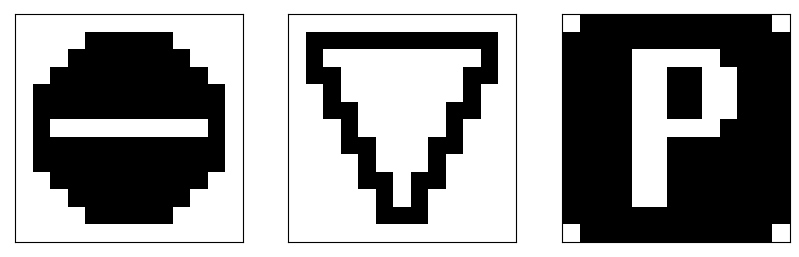

In [8]:
errors, results = testing(weights, test, number_patterns, patterns)
for i in range(len(errors)):
    print(f'Итоговая величина ошибки {i+1}-го рисунка: {errors[i]}')

visual(results, number_patterns, pattern_height, pattern_width)

Видно, что восстановленные дорожные знаки ничем не отличаются от изначальных. Отсюда можно сделать вывод о том, что при величине изменений в **1,5** единицы нейронная сеть отлично восстанавливает образы. Далее, уменьшим значение данного параметра до **0,9** и оценим результаты:

Величина ошибки 1-го рисунка: 0.3136094674556213
Величина ошибки 2-го рисунка: 0.1242603550295858
Величина ошибки 3-го рисунка: 0.46153846153846156


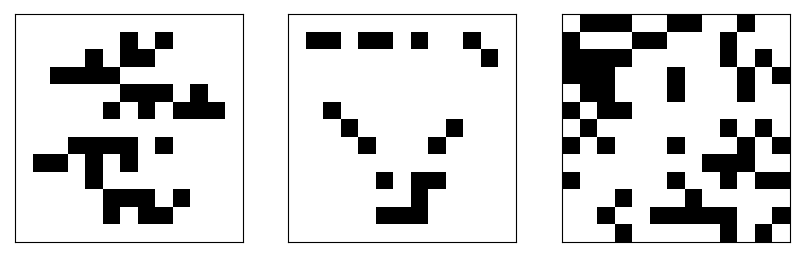

Итоговая величина ошибки 1-го рисунка: 0.24260355029585798
Итоговая величина ошибки 2-го рисунка: 0.0
Итоговая величина ошибки 3-го рисунка: 0.6331360946745562


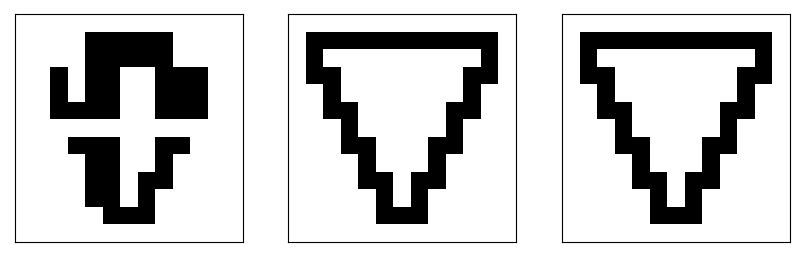

In [12]:
test = create_noise(patterns, 0.9)      #тестовый набор данных
for i in range(len(test)):
    print(f'Величина ошибки {i+1}-го рисунка: {error_counter(test[i], patterns[i])}')
visual(test, number_patterns, pattern_height, pattern_width)

errors, results = testing(weights, test, number_patterns, patterns)
for i in range(len(errors)):
    print(f'Итоговая величина ошибки {i+1}-го рисунка: {errors[i]}')

visual(results, number_patterns, pattern_height, pattern_width)

Как видно теперь, сеть Хопфилда справилась с распознанием и восстановлением лишь одной из трёх картинок. Также, можно заметить, что третья восстановленная картинка является инвертированным первым дорожным знаком, а первая картинка представляет из себя смесь двух дорожных знаков: **Въезд запрещен** и **Уступи дорогу**.

# Дополнительное задание <a id='6'></a>

В качестве дополнительного задания было предложено добавить в массив рисунков еще один дорожный знак. В качестве нового дорожного знака был выбран знак **Главная дорога**. На рисунке ниже представлены все используемые дорожные знаки:

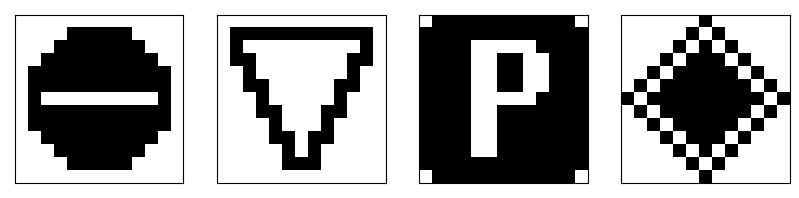

In [134]:
new = [-1,-1,-1,-1,-1,-1, 1,-1,-1,-1,-1,-1,-1,          #Знак главная дорога
       -1,-1,-1,-1,-1, 1,-1, 1,-1,-1,-1,-1,-1,
       -1,-1,-1,-1, 1,-1, 1,-1, 1,-1,-1,-1,-1,
       -1,-1,-1, 1,-1, 1, 1, 1,-1, 1,-1,-1,-1,
       -1,-1, 1,-1, 1, 1, 1, 1, 1,-1, 1,-1,-1,
       -1, 1,-1, 1, 1, 1, 1, 1, 1, 1,-1, 1,-1,
        1,-1, 1, 1, 1, 1, 1, 1, 1, 1, 1,-1, 1,
       -1, 1,-1, 1, 1, 1, 1, 1, 1, 1,-1, 1,-1,
       -1,-1, 1,-1, 1, 1, 1, 1, 1,-1, 1,-1,-1,
       -1,-1,-1, 1,-1, 1, 1, 1,-1, 1,-1,-1,-1,
       -1,-1,-1,-1, 1,-1, 1,-1, 1,-1,-1,-1,-1,
       -1,-1,-1,-1,-1, 1,-1, 1,-1,-1,-1,-1,-1,
       -1,-1,-1,-1,-1,-1, 1,-1,-1,-1,-1,-1,-1]

patterns = np.append(patterns, [new], axis=0)
number_patterns = 4
visual(patterns, number_patterns, pattern_height, pattern_width)

Далее, необходимо обучить сеть Хопфилда на новом наборе исходных патернов.

In [135]:
weights = train(patterns, number_patterns, pattern_height, pattern_width)

После обучения, нужно создать "испорченные" версии дорожных знаков, путем накладывания шумов на исходные изображения. Ниже на рисунке представлены искаженные варианты изображений:

Величина ошибки 1-го рисунка: 0.11834319526627218
Величина ошибки 2-го рисунка: 0.011834319526627219
Величина ошибки 3-го рисунка: 0.20118343195266272
Величина ошибки 4-го рисунка: 0.15976331360946747


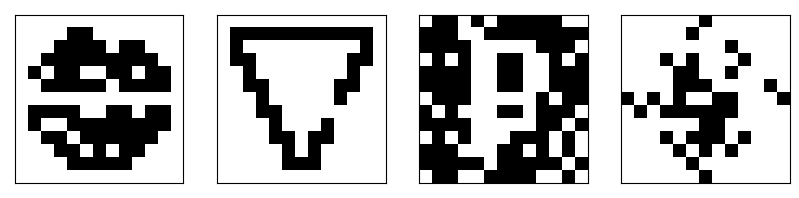

In [147]:
test = create_noise(patterns, 2)      #тестовый набор данных
for i in range(len(test)):
    print(f'Величина ошибки {i+1}-го рисунка: {error_counter(test[i], patterns[i])}')
visual(test, number_patterns, pattern_height, pattern_width)

После завершения всех приготовительных работ, можно приступать к получению результатов восстановления изображений. Ниже на рисунке представлены результаты восстановления:

Итоговая величина ошибки 1-го рисунка: 0.11242603550295859
Итоговая величина ошибки 2-го рисунка: 0.0
Итоговая величина ошибки 3-го рисунка: 0.0
Итоговая величина ошибки 4-го рисунка: 0.047337278106508875


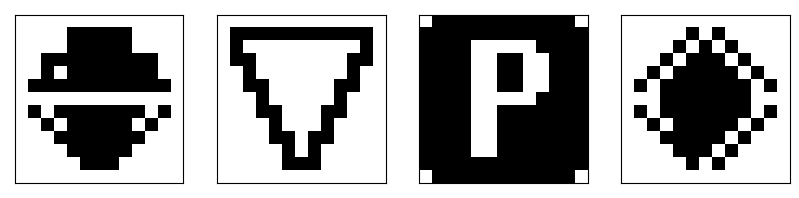

In [152]:
errors, results = testing(weights, test, number_patterns, patterns)
for i in range(len(errors)):
    print(f'Итоговая величина ошибки {i+1}-го рисунка: {errors[i]}')

visual(results, number_patterns, pattern_height, pattern_width)

Как видно из показанных выше рисунков, второе и третье изображения восстановились отлично. Однако, первое и четвертое изображения не были восстановлены. Если делать предположение, почему это произошло, то можно сказать - это связано с тем, что разница между двумя этими картинками небольшая. И если запустить функцию `error_counter` между изображениями, то можно подтвердить (или опровергнуть) данное предположение.

In [162]:
for i in range(len(patterns)):
    for j in range(i+1, len(patterns)):
        print(f'Величина ошибки между {i+1} и {j+1} картинками: {round(error_counter(patterns[i], patterns[j]), 3)}')

Величина ошибки между 1 и 2 картинками: 0.426
Величина ошибки между 1 и 3 картинками: 0.574
Величина ошибки между 1 и 4 картинками: 0.29
Величина ошибки между 2 и 3 картинками: 0.633
Величина ошибки между 2 и 4 картинками: 0.408
Величина ошибки между 3 и 4 картинками: 0.686


Как видно из полученного ответа, наименьшее значение величины различий между двумя дорожными знаками является как раз между знаком **Кирпич** и **Главная дорога**, что подтверждает предположение, написанное выше.

# Выводы <a id='5'></a>

Таким образом, в ходе выполнения данной лабораторной работы я познакомился с таким алгоритмом искусственного интеллекта, как нейронная сеть Хопфилда. Я узнал о том: какой алгоритм лежит в основе данной сети, как происходит процесс обучения сети, как она распознает и восстанавливает образы. Помимо этого, в результате выполнения работы я: реализовал данную нейронную сеть при помощи Python; создал для работы данной сети массив исходных изображений, массив искажённых изображений и массив предсказанных изображений; создал функцию искажения данных при помощи добавления шумов к значению элемента. Кроме того, в результате тестирования работоспособности данной сети было выяснено то, что данная сеть неплохо справляется с восстановлением образов при не очень сильных искажениях. Если же данные подверглись большому искажению, то могу возникнуть ошибки в определении изначального изображения.